In [4]:
import pandas as pd

# Load .txt file (adjust delimiter as needed)
df = pd.read_csv('DATASETS\Stock_datasets\Data\Stocks\hlb.us.txt', delimiter='\t')  # For tab-delimited files, use '\t'

df.head()

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14048\2184896972.py:4: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('DATASETS\Stock_datasets\Data\Stocks\hlb.us.txt', delimiter='\t')  # For tab-delimited files, use '\t'


,"Date,Open,High,Low,Close,Volume,OpenInt"
0,"2005-02-25,28.172,28.931,28.047,28.866,13940,0"
1,"2005-02-28,28.999,29.081,28.652,28.736,16607,0"
2,"2005-03-01,28.875,28.875,28.627,28.727,11276,0"
3,"2005-03-02,28.875,28.875,28.659,28.659,6787,0"
4,"2005-03-03,28.667,28.791,28.667,28.718,4607,0"


In [6]:
dfi = pd.read_csv('DATASETS\Stock_datasets\currency-exchange-rates\currency_exchange_rates_02-01-1995_-_02-05-2018.csv')

dfi.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14048\609952208.py:1: SyntaxWarning: invalid escape sequence '\S'
  dfi = pd.read_csv('DATASETS\Stock_datasets\currency-exchange-rates\currency_exchange_rates_02-01-1995_-_02-05-2018.csv')


,Date,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
0,1995-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1995-1-3,NaN,NaN,0.376,NaN,NaN,0.843,NaN,1.4035,NaN,...,3.55,50.04,7.4588,1.3168,25.10,5.8750,NaN,3.671,1.5617,1.0
2,1995-1-4,NaN,0.7704,0.376,NaN,NaN,0.844,NaN,1.4026,NaN,...,3.56,50.07,7.4480,1.3161,25.13,5.8738,NaN,3.671,1.5605,1.0
3,1995-1-5,NaN,0.7693,0.376,NaN,NaN,0.844,NaN,1.4002,NaN,...,3.55,50.07,7.4450,1.3080,25.14,5.8700,NaN,3.671,1.5610,1.0
4,1995-1-6,NaN,0.7699,0.376,NaN,NaN,0.842,NaN,1.4002,NaN,...,3.56,50.07,NaN,1.3040,25.13,5.8810,NaN,3.671,1.5645,1.0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('DATASETS\Stock_datasets\currency-exchange-rates\currency_exchange_rates_02-01-1995_-_02-05-2018.csv')
# Step 2: Data Cleaning and Preparation
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
# Drop rows with invalid 'Date' values
df = df.dropna(subset=['Date'])

# Set 'Date' as index and handle missing values only for numeric columns
dfi = df.select_dtypes(include=[np.number])  # Select only numeric columns for mean imputation
dfi.fillna(dfi.mean(), inplace=True)


<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14048\1767135409.py:9: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('DATASETS\Stock_datasets\currency-exchange-rates\currency_exchange_rates_02-01-1995_-_02-05-2018.csv')


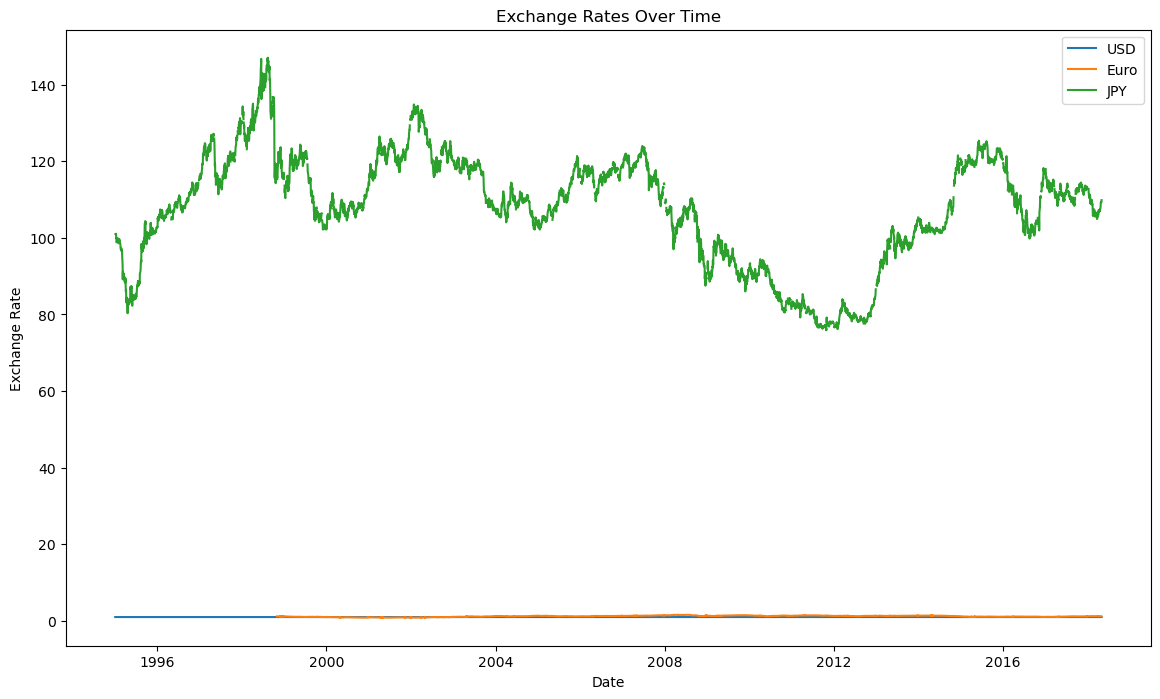

In [13]:
# # Step 3: Initial Visualization

# Plotting a few selected exchange rates to observe trends
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['U.S. Dollar'], label="USD")
plt.plot(df['Date'], df['Euro'], label="Euro")
plt.plot(df['Date'], df['Japanese Yen'], label="JPY")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rates Over Time")
plt.legend()
plt.show()

Features selected by Low Variance Filter:
Index(['Algerian Dinar', 'Bolivar Fuerte', 'Botswana Pula', 'Brazilian Real',
       'Chilean Peso', 'Chinese Yuan', 'Colombian Peso', 'Czech Koruna',
       'Danish Krone', 'Hungarian Forint', 'Icelandic Krona', 'Indian Rupee',
       'Indonesian Rupiah', 'Iranian Rial', 'Israeli New Sheqel',
       'Japanese Yen', 'Kazakhstani Tenge', 'Korean Won', 'Libyan Dinar',
       'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso',
       'Nepalese Rupee', 'Norwegian Krone', 'Pakistani Rupee', 'Peso Uruguayo',
       'Philippine Peso', 'Polish Zloty', 'Russian Ruble',
       'South African Rand', 'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc',
       'Thai Baht', 'Year'],
      dtype='object')

Features remaining after High Correlation Filter:
Index(['Algerian Dinar', 'Australian Dollar', 'Bahrain Dinar',
       'Bolivar Fuerte', 'Botswana Pula', 'Brazilian Real', 'Chilean Peso',
       'Czech Koruna', 'Danish Krone', 'Icelandic Krona', 'Indian 

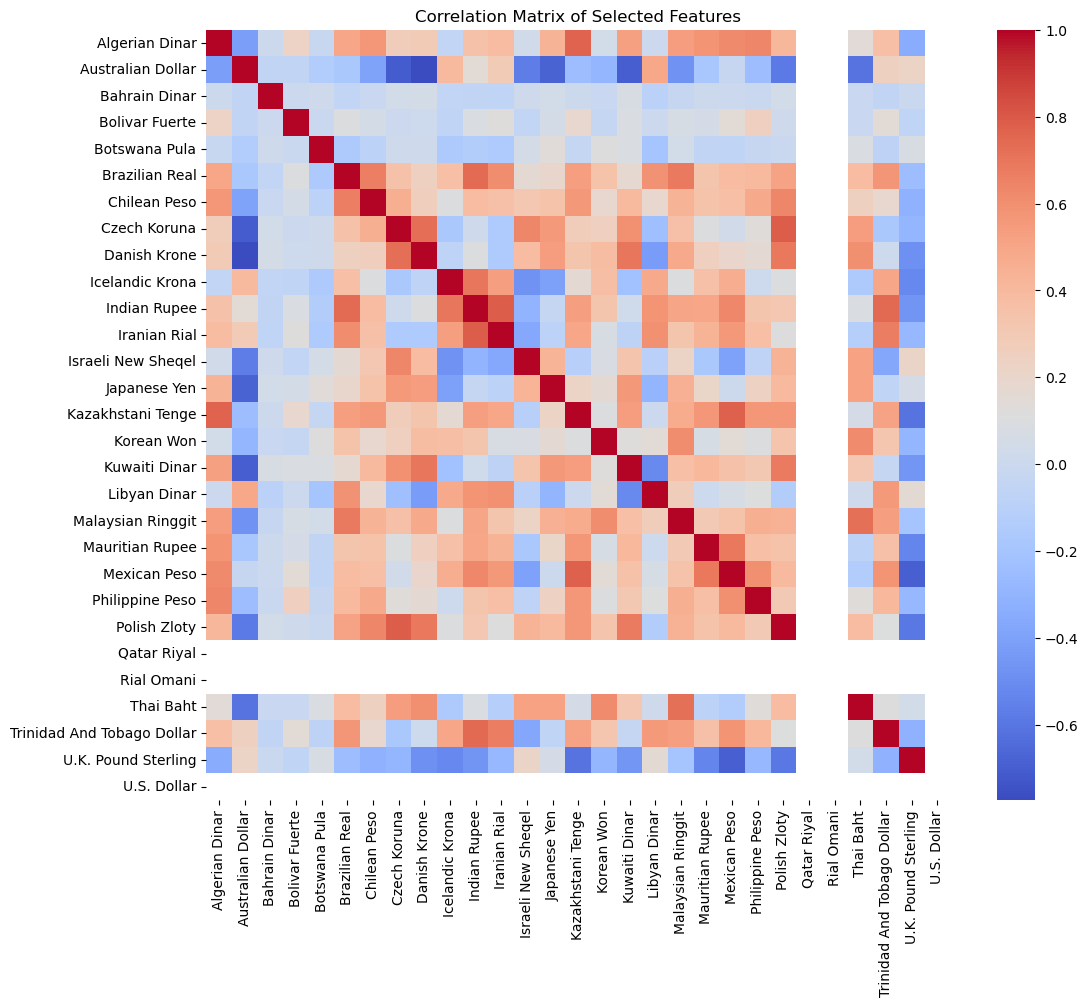

In [14]:
# # Step 4: Feature Selection

# # Technique 1: Low Variance Filter
selector = VarianceThreshold(threshold=0.05)  # Set a threshold for variance
high_variance_data = selector.fit_transform(dfi)

# # Get column names with high variance
selected_features_var = dfi.columns[selector.get_support()]
df_var = pd.DataFrame(high_variance_data, columns=selected_features_var, index=df.index)

print("Features selected by Low Variance Filter:")
print(selected_features_var)

# # Technique 2: High Correlation Filter
corr_matrix = dfi.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df_corr = dfi.drop(columns=to_drop)

print("\nFeatures remaining after High Correlation Filter:")
print(df_corr.columns)

# # Visualize the correlation matrix for selected features
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Selected Features")
plt.show()


In [15]:
# # Step 5: Model Training

# # Choose a target variable for prediction, e.g., 'U.S. Dollar'
target = 'U.S. Dollar'
X = df_corr.drop(columns=[target]).fillna(0)  # Ensure no NaN values in features
y = df_corr[target]

# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# # Make predictions
y_pred = model.predict(X_test)


Mean Squared Error: 0.0
R^2 Score: 1.0


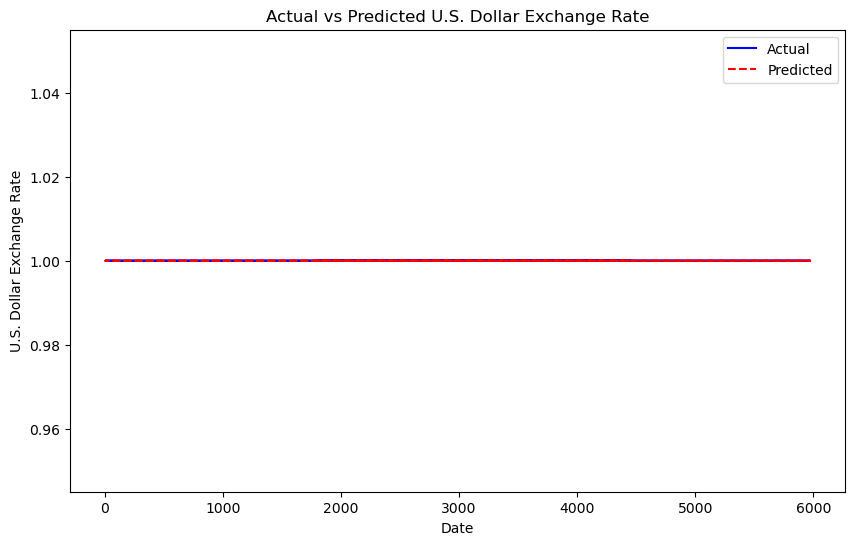

In [16]:
# # Step 6: Model Evaluation

# # Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# # Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("U.S. Dollar Exchange Rate")
plt.title("Actual vs Predicted U.S. Dollar Exchange Rate")
plt.legend()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


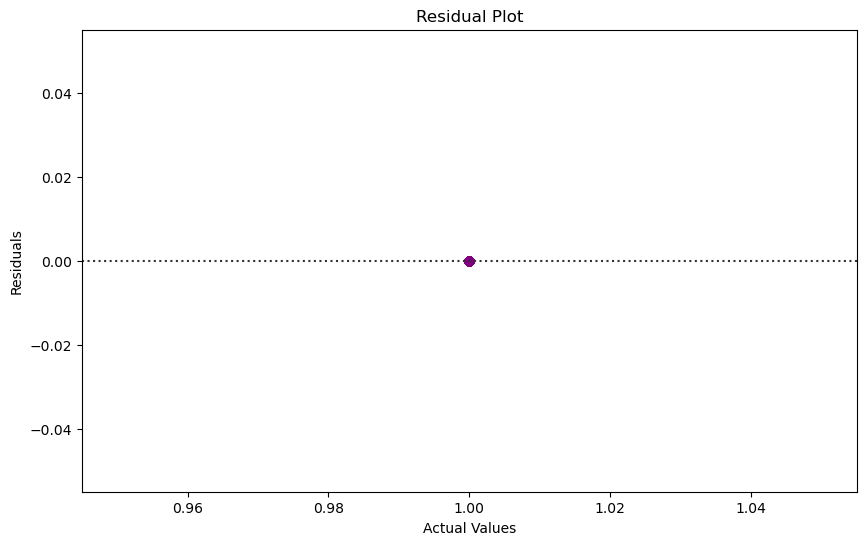

In [17]:

# # Step 7: Residual Plot to check errors
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred - y_test, lowess=True, color="purple")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
